# Assignment 1.2 - KNNR / DNNR

# Course Assignment Guidelines

---

## 📚 Weekly Assignment Structure

Each week includes **two assignments**:

| File Format | Required For |
|-------------|--------------|
| `assignment[x]_1.ipynb` | All students |
| `assignment[x]_2.ipynb` | 10 ECTS students only |

Upload your solution as a `.ipynb` file **AND** a `.pdf` file in the respective entry in the whiteboard. You will find each deadline there as well.

---

## ✅ Grading Requirements

### Pass/Fail System
* Each submitted `.ipynb` notebook receives either a **"pass"** or **"fail"** grade
* **Minimum # of passes: n-1** 

### Separate Tracking
The n-1 # of passes is tracked **separately** for each assignment type:

#### For 5 ECTS Students:
- ✔️ Must achieve n-1 # of passes on `assignment[x]_1.ipynb` series

#### For 10 ECTS Students:
- ✔️ Must achieve n-1 # of passes on `assignment[x]_1.ipynb` series
- ✔️ Must achieve n-1 # of passes on `assignment[x]_2.ipynb` series

---

## 🌟 BONUS Tasks

- **Optional BONUS tasks** appear in some notebooks
- Successfully completing **BONUS** tasks earns **extra points** toward your final grade
- Check the **Whiteboard** assignment grading for bonus point confirmations
- 10 ECTS students will find separate bonus tasks in `assignment[x]_2.ipynb`
- 5 ECTS students will **NOT** get additional extra points for solving `assignment[x]_2.ipynb` Bonus tasks
- Vice Versa: 10 ECTS students will **NOT** get additional extra points for solving `assignment[x]_1.ipynb` Bonus tasks

---

## 📋 Quick Summary

| Study Program | Requirements | Pass Criteria |
|---------------|-------------|---------------|
| **5 ECTS** | `assignment[x]_1.ipynb` | n-1 |
| **10 ECTS** | `assignment[x]_1.ipynb` + `assignment[x]_2.ipynb` | n-1 each |
| **All Students** | Optional BONUS tasks | Extra final exam points |


**Note:** The n-1 rule is mandatory to pass the tutorial component of the module.

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry as .ipynb-file and as .pdf. <br><br>
Please do **NOT** rename the file!

#### State both names of your group members here:
[Jane and John Doe]

In [1]:
# Daniel Thompson and Paola Gega

## Grading Info/Details - Assignment 1.2:

The assignment will be graded semi-automatically, which means that your code will be tested against a set of predefined test cases and qualitatively assessed by a human. This will speed up the grading process for us.

* For passing the test scripts: 
    - Please make sure to **NOT** alter predefined class or function names, as this would lead to failing of the test scripts.
    - Please do **NOT** rename the files before uploading to the Whiteboard!

* **(RESULT)** tags indicate checkpoints that will be specifically assessed by a human.

* You will pass the assignment if you pass the majority of test cases and we can at least confirm effort regarding the **(RESULT)**-tagged checkpoints per task.

Note: For now, we will keep the test cases black-boxed, meaning we won't reveal their internal implementation details. This might be subject to change in the future, depending on how well we can keep up writing test cases for upcoming assignments which are still work in progress. (:

## Task 1.2.1 - kNN on House Pricing Data (KNNR)

Implement the k-Nearest Neighbor (kNN) algorithm from scratch using only NumPy. <br><br> You may use the provided sklearn functions to load datasets and evaluate your results. Apply your kNN implementation on a regression Problem - the [California Housing Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

* Show 5 data samples to get an idea of the data. **(RESULT)**
* Split the dataset into a training set (80%) and a test set (20%). Train your model on the training set and evaluate it on the test set using the mean squared error (MSE) as a metric. Try at least 3 different values for k (e.g., 1, 3, 5) and 2 different distance measures (e.g., Euclidean, Manhattan). Report on your results. **(RESULT)**

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd

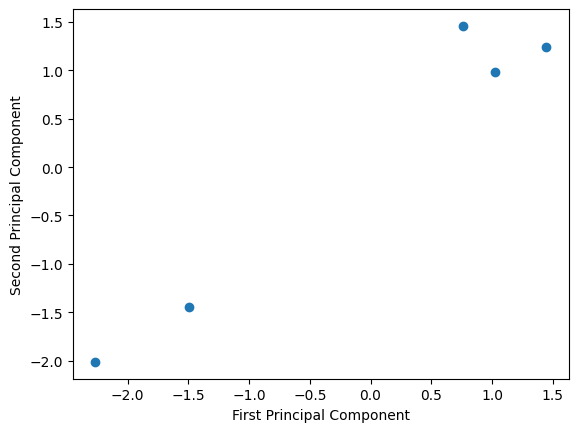

In [3]:
# Get California Housing Data
data = fetch_california_housing()
X, y = data.data, data.target
# print(X.shape, y.shape)

# Split data and normalize features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train = (X_train-X_train.mean(axis=0))/X_train.std(axis=0)
X_test = (X_test-X_test.mean(axis=0))/X_test.std(axis=0)

# Choose five random samples from the training set
rand_inds = np.array(np.random.choice(len(y_train), 5, replace=False)) # generate 5 random indices
# First project on the pricipal components
cov_matrix = np.cov(X_train.T)
values, vectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(values)[::-1]
values_sorted = values[sorted_indices]
vectors_sorted = vectors[:,sorted_indices]
pca_components = vectors_sorted[:, :2]
projected_data = np.dot(X_train[rand_inds], pca_components)
# Plot the projection
plt.scatter(projected_data[:, 0], projected_data[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Make sure epsilon in suitably small for our data
ep = np.min(X.std(axis=0)) * 0.0001

In [4]:
class KNNRegressor:
    """Your KNN Regressor implementation"""
    def __init__(self, k=3, p=2):
        self.k = k
        self.p = p
        
    def fit(self, X_train, y_train):
        """Fit the model using the training data."""
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        """Predict label for multiple samples."""
        n_test = len(X_test)
        y_test_hat = np.empty(n_test, dtype=float) # initialise predicted label array
        
        for i in np.arange(n_test): # go through test samples
            dist = np.linalg.norm(self.X_train - X_test[i], ord=self.p, axis=1) # compute L_p distance of every training sample to test sample at hand
            sorted_ind = np.argsort(dist)[:self.k] # indices of k closest neighbors
            """Take a distance-weighted average of nearest_lables"""
            y_test_hat[i]= np.sum(self.y_train[sorted_ind] / (dist[sorted_ind]+ep))/np.sum(1/(dist[sorted_ind]+ep))

        return y_test_hat
        

In [5]:
print("Euclidean metric:")
for k in [1,3,5]:
    KNN = KNNRegressor(k)
    KNN.fit(X_train, y_train)
    y_test_hat = KNN.predict(X_test)
    print("Mean squared error for k={}:".format(k), np.mean((y_test_hat - y_test)**2))
print("Manhattan metric:")
for k in [1,3,5]:
    KNN = KNNRegressor(k,p=1)
    KNN.fit(X_train, y_train)
    y_test_hat = KNN.predict(X_test)
    print("Mean squared error for k={}:".format(k), np.mean((y_test_hat - y_test)**2))

Euclidean metric:
Mean squared error for k=1: 0.6589790179354892
Mean squared error for k=3: 0.43800108066972043
Mean squared error for k=5: 0.40162225385580763
Manhattan metric:
Mean squared error for k=1: 0.6018610863945736
Mean squared error for k=3: 0.39938934379780183
Mean squared error for k=5: 0.36374872108243833


## Task 1.2.2 - DNNR

Implement the DNNR algorithm yourself and apply it to the same regression problem from Task 1.2.1. <br><br> You may use the provided sklearn functions to load datasets and evaluate your results. Apply your kNN implementation on a regression Problem - the [California Housing Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

* Split the dataset into a training set (80%) and a test set (20%). Train your model on the training set and evaluate it on the test set using the mean squared error (MSE) as a metric. Try at least 3 different values for k (e.g., 1, 3, 5) and report the results. **(RESULT)**
* How does the predicition quality of DNNR compare to kNN? Discuss your results. **(RESULT)**

In [13]:
class DNNRegressor:
    """DNNR - uses local gradients for Taylor approximation"""
    def __init__(self, k=5, p=2, k_gradient=10):
        self.k = k  # neighbors for prediction
        self.p = p
        self.k_gradient = k_gradient  # neighbors for gradient estimation
        
    def fit(self, X_train, y_train):
        """Fit the model using the training data."""
        self.X_train = X_train
        self.y_train = y_train
        n_train = len(X_train)
        self.gamma_hat = np.empty((n_train,len(X_train[0])), dtype=float) # initialise array of gradients
        for i in np.arange(n_train): # go through test samples
            dist = np.linalg.norm(self.X_train - self.X_train[i], ord=self.p, axis=1) # compute L_p distance of every training sample to test sample at hand
            sorted_ind = np.argsort(dist)[1:self.k_gradient+1] # indices of k_gradient closest neighbors
            """Estimate the gradient near sample based on the labels of neighboring points"""
            regressors = self.X_train[sorted_ind] - self.X_train[i]
            self.gamma_hat[i] = np.linalg.inv(np.dot(regressors.T, regressors)).dot(regressors.T).dot(self.y_train[sorted_ind]-self.y_train[i])
    
    def predict(self, X_test):
        """Predict label for multiple samples."""
        n_test = len(X_test)
        y_test_hat = np.empty(n_test, dtype=float) # initialise predicted label array
        
        for i in np.arange(n_test): # go through test samples
            dist = np.linalg.norm(self.X_train - X_test[i], ord=self.p, axis=1) # compute L_p distance of every training sample to test sample at hand
            sorted_ind = np.argsort(dist)[:self.k] # indices of k closest neighbors
            """Take the average of the labels predicted for x
             based on first-order approximations of the model near neighboring points"""
            y_test_hat[i]= np.mean(self.y_train[sorted_ind])
            for j in sorted_ind:
                y_test_hat[i] += np.dot(self.gamma_hat[j],X_test[i]-self.X_train[j])/self.k

        return y_test_hat

In [14]:
print("Euclidean metric:")
for k in [1,3,5]:
    DNN = DNNRegressor(k, k_gradient=50)
    DNN.fit(X_train, y_train)
    y_test_hat = DNN.predict(X_test)
    print("Mean squared error for k={}:".format(k), np.mean((y_test_hat - y_test)**2))

Euclidean metric:
Mean squared error for k=1: 0.5674653745611209
Mean squared error for k=3: 0.42551330732867815
Mean squared error for k=5: 0.3915751856526668


## Congratz, you made it! :)